The idea of the function work:

- The score will be calculated by how many times the top N word appear multiplied by the frequency of it in the whole language
- The score will be divided by occurrence of the top N words in the article

In [2]:


def lang_confidence_score(word_counts, language_words_with_frequency):
    # I suppose that language_words_with_frequency is a list of lists of 2 elements (word and frequency)
    score = 0
    for word , freq in language_words_with_frequency:
        count_in_text = word_counts.get(word,0)
        score += count_in_text * freq
    sum = 0
    for word , count in word_counts.items():
        sum += count
    return score/sum

I choose english (the language which was used for writing pokemon wiki) , french and spanish


In [17]:
import wordfreq
def get_top_words(number):
    ListOfWordsInEnglish = wordfreq.top_n_list(n = number , lang= 'en')
    ListOfWordsInFrench = wordfreq.top_n_list(n = number , lang='fr')
    ListOfWordsInSpanish = wordfreq.top_n_list(n = number , lang= 'es')
    ListOfWordsInEnglishWithFreq = []
    ListOfWordsInFrenchWithFreq = []
    ListOfWordsInSpanishWithFreq = []
    for i in range(number):
        ListOfWordsInEnglishWithFreq.append([
            ListOfWordsInEnglish[i],
            wordfreq.word_frequency(ListOfWordsInEnglish[i], lang='en')
        ])
        ListOfWordsInFrenchWithFreq.append([
            ListOfWordsInFrench[i],
            wordfreq.word_frequency(ListOfWordsInFrench[i], lang='fr')
        ])
        ListOfWordsInSpanishWithFreq.append([
            ListOfWordsInSpanish[i],
            wordfreq.word_frequency(ListOfWordsInSpanish[i], lang='es')
        ])
    return [ListOfWordsInEnglishWithFreq, ListOfWordsInFrenchWithFreq, ListOfWordsInSpanishWithFreq]

In [1]:
from wiki_scraper import Scraper
import json

dictionery = []
def get_count_word(phrase , use_local=False , URL = None):
    if not use_local:
        obiekt = Scraper(URL)
    else:
        obiekt = Scraper(use_local_html_file_instead=True)
    if obiekt.count_words(phrase) is None:
        print("Nie powiódł się count-words")
        raise Exception
    with open("./word-count.json" , 'r' , encoding='utf-8') as file:
        word_count = json.load(file)
    count = 0
    for word in word_count:
        count += word_count[word]
    print(count)
    return word_count
dictionery.append(get_count_word('Team Rocket' , use_local=True))
dictionery.append(get_count_word('Charamnder' , use_local=False , URL = "https://bulbapedia.bulbagarden.net/wiki"))
dictionery.append(get_count_word('List of Pokémon by height' , use_local=False , URL = "https://bulbapedia.bulbagarden.net/wiki"))
dictionery.append(get_count_word('Charles de Gaulle' , use_local=True))
dictionery.append(get_count_word('Da Vinci' , use_local=True))

ConnectionError: HTTPSConnectionPool(host='bulbapedia.bulbagarden.net', port=443): Max retries exceeded with url: /wiki/Charamnder (Caused by NameResolutionError("HTTPSConnection(host='bulbapedia.bulbagarden.net', port=443): Failed to resolve 'bulbapedia.bulbagarden.net' ([Errno -3] Temporary failure in name resolution)"))

In [9]:
k = [3 , 10 , 100 , 1000]

In [10]:
freqs = get_top_words(k[-1])
scores = []
for k_val in k:
    en_scores_k = []
    fr_scores_k = []
    es_scores_k = []
    for word_dict in dictionery:
        en_scores_k.append(lang_confidence_score(word_dict, freqs[0][:k_val]))
        fr_scores_k.append(lang_confidence_score(word_dict, freqs[1][:k_val]))
        es_scores_k.append(lang_confidence_score(word_dict, freqs[2][:k_val]))
    scores.append([
        en_scores_k,
        fr_scores_k,
        es_scores_k
    ])

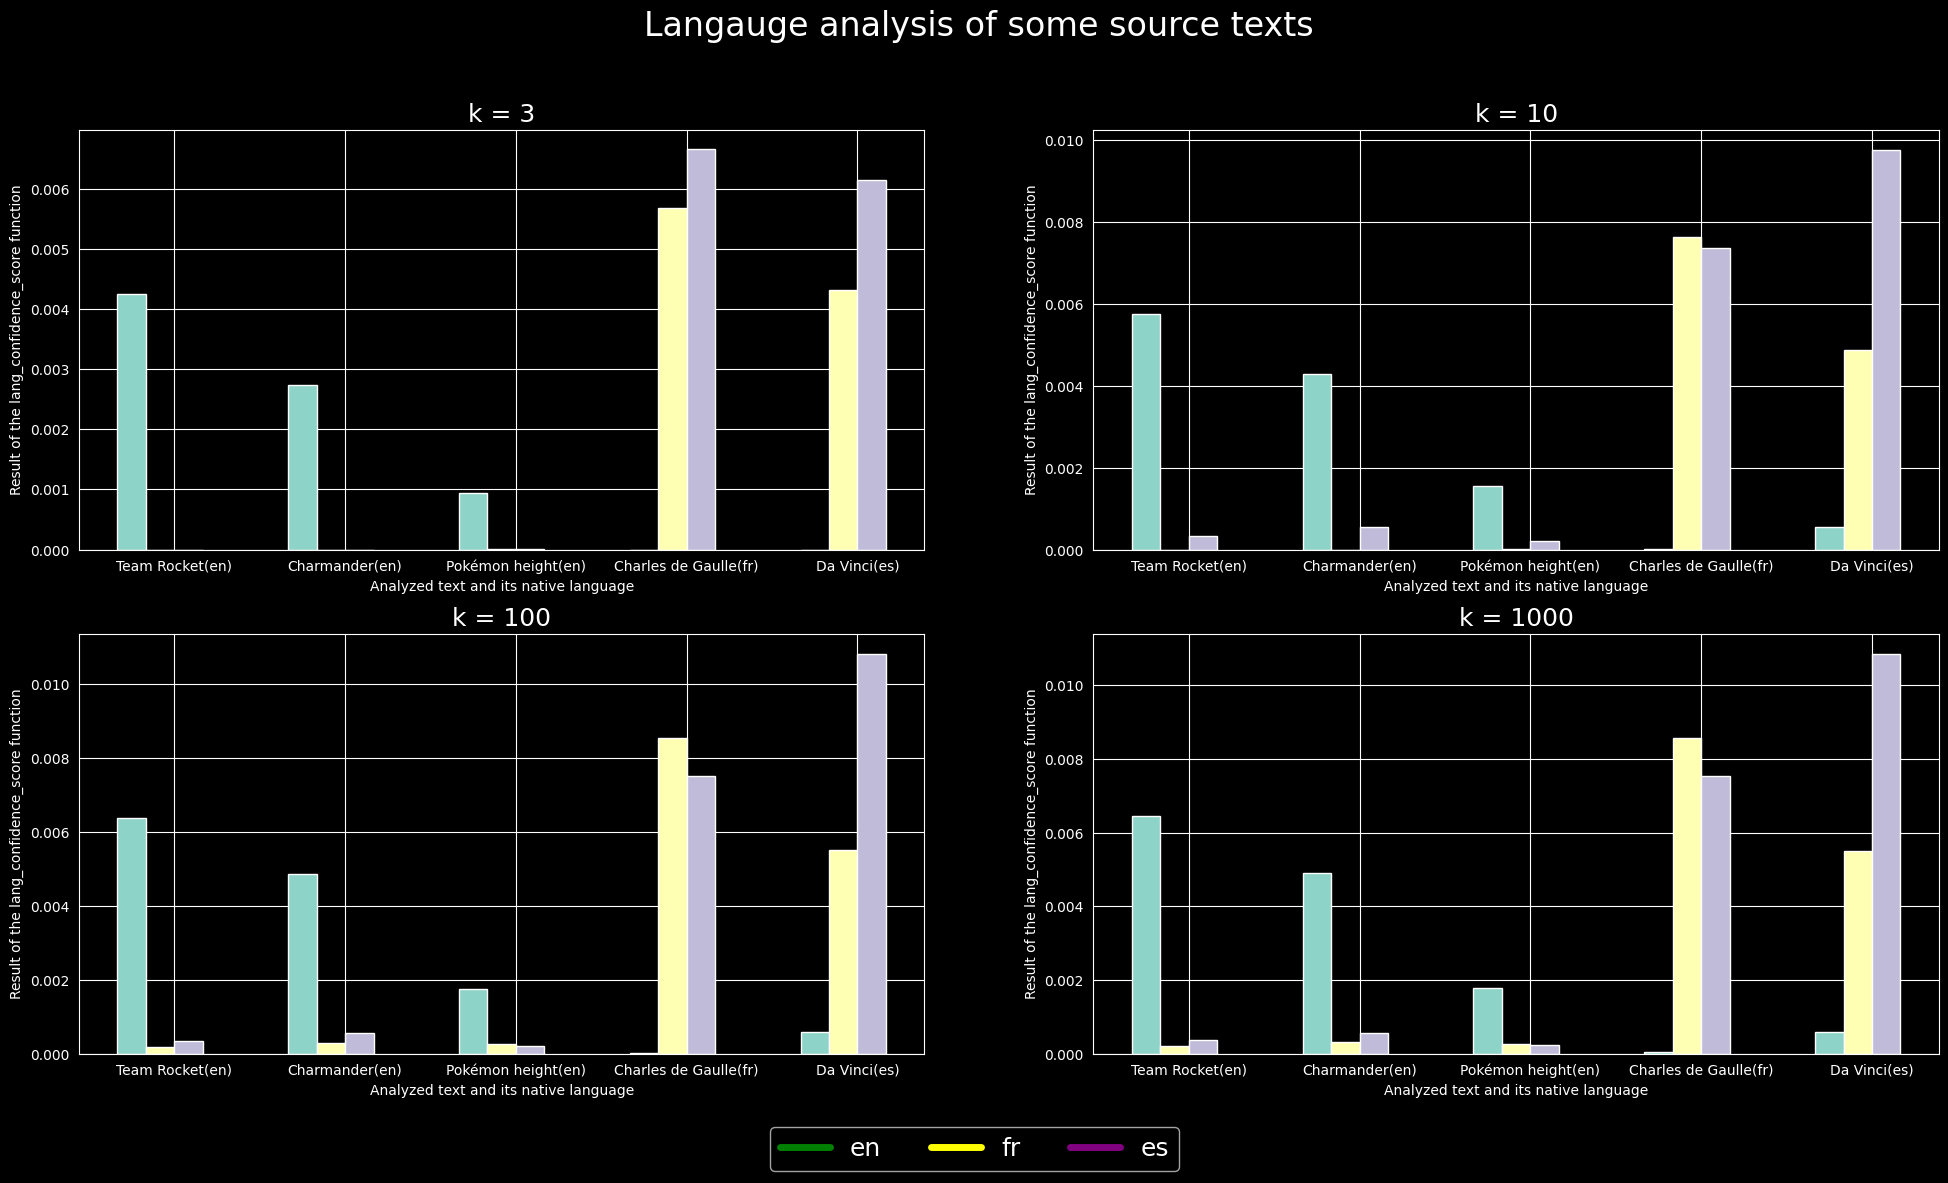

In [14]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(24, 12)
fig.suptitle("Langauge analysis of some source texts", fontsize=24)

legend_elements = [
    Line2D([0], [0], color="green", lw=5, label="en"),
    Line2D([0], [0], color="yellow", lw=5, label="fr"),
    Line2D([0], [0], color="purple", lw=5, label="es")
]
fig.legend(handles=legend_elements, loc="lower center", ncol=4, fontsize=18)

width_cluster = 0.5
width_bar = width_cluster / 3
index = ["Team Rocket(en)", "Charmander(en)", "Pokémon height(en)", "Charles de Gaulle(fr)", "Da Vinci(es)"]

x = np.arange(len(index))

for axs_no in range(4):
    axs[axs_no // 2, axs_no % 2].set_title(f"k = {k[axs_no]}", fontsize=18)
    axs[axs_no // 2, axs_no % 2].set_xlabel("Analyzed text and its native language")
    axs[axs_no // 2, axs_no % 2].set_ylabel("Result of the lang_confidence_score function")
    for n in range(3):
        x_pos = x + (width_bar * n) - width_cluster / 2
        axs[axs_no // 2, axs_no % 2].bar(x_pos, scores[axs_no][n], width_bar, align="edge", tick_label=index)

# Conclusions:

- It can be observed that the function reflects the texts well.
After looking at each of the plots, it can be concluded that the French language, in terms of the most frequent words, is similar to Spanish.
- It is visible that the article with the smallest amount of English content received a low score, while the article with the largest amount of Spanish content achieved the highest score.
- It can also be seen that for the article about Charles de Gaulle, the French and Spanish language indicators are almost equal.
- Additionally, the Spanish language indicator for the Charles de Gaulle article slightly increases for k = 3 compared to k = 1000.

# Summary:

In summary, the choice of language matters because French and Spanish use many similar words, unlike English, which may overlap with French to some extent, but at the level of the top 1000 words their intersection is close to empty.